In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Reloading the module
import importlib

import OrthogonalPolynomials
importlib.reload(OrthogonalPolynomials)
from OrthogonalPolynomials import *

import GeneralFunctionality
importlib.reload(GeneralFunctionality)
from GeneralFunctionality import *

from scipy.special import eval_legendre, roots_legendre
from scipy import integrate

In [7]:
# Finding the Legendre Gauss points
N = 40
# Node index: 0,1,...,N -> N+1 nodes -> zeros of L_{N+1}
x_Le, w_Le = roots_legendre(N+1)
# Barycentric weights
w_bary = BarycentricWeights(x_Le)
# Differentiation matrix
D = PolynomialDiffMatrix(x_Le, w_bary)
# 2nd-order differentiation matrix
D2 = PolynomialDiffMatrix_HighOrder(2, x_Le, w_bary, D)

In [8]:
def MatrixG(N, D, w): 
    # Computing the matrix G on the RHS of the ODE system
    # D2: 2nd-order differentiation matrix
    # w: Legendre Gauss weights
    # The subroutine can be improved by numpy vectorization
    
    G = np.zeros((N+1, N+1))
    for j in range(N+1):
        for m in range(N+1):
            for k in range(N+1):
                G[j,m] += w[k] * D[k,m] * D[k,j]
            G[j,m] /= w[j]
            
    return G

G = MatrixG(N, D, w_Le)

In [9]:
l_left, l_right = LagrangePolynomialsBoundaryValues(N, x_Le, w_bary)

In [10]:
def RHS(t, u, N, x_Le, w_Le, w_bary, D, G, l_left, l_right):
    # Evaluating the RHS of the ODE system
    
    # Derivatives of the interpolating polynomial at the boundaries
    ux_left = LagrangeInterpolationDerivativeBary(-1.0, x_Le, u, w_bary, D)
    ux_right = LagrangeInterpolationDerivativeBary(1.0, x_Le, u, w_bary, D)
    
    
    rhs = (ux_right*l_right - ux_left*l_left) / w_Le - np.dot(G, u)
    
    return rhs

Text(0.5, 1.0, '$u_t=u_{xx}$')

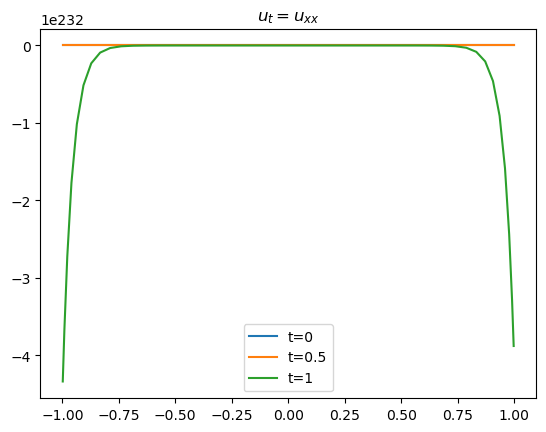

In [11]:
# Scipy calculation

# Initial condition
u0 = 1 - x_Le**2

t_span = [0, 1]
t_eval=[0, 0.5, 1]
sol = solve_ivp(RHS, 
                t_span=t_span, 
                y0=u0, 
                method='RK45', 
                t_eval=t_eval, 
                args=(N, x_Le, w_Le, w_bary, D, G, l_left, l_right))

fig = plt.figure()
ax = fig.add_subplot(111)

Nt = len(t_eval)
for it in range(Nt):
    ax.plot(x_Le, sol.y[:,it], label='t={}'.format(t_eval[it]))

ax.legend()
ax.set_title(r'$u_t=u_{xx}$')